<a href="https://colab.research.google.com/github/sudheer24/udl_notebooks/blob/main/Notebooks/Chap06/6_3_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 6.3: Stochastic gradient descent**

This notebook investigates gradient descent and stochastic gradient descent and recreates figure 6.5 from the book

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.





In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [ ]:
# Let's create our training data of 30 pairs {x_i, y_i}
# We'll try to fit the Gabor model to these data
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

In [ ]:
# Let's define our model
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

In [ ]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

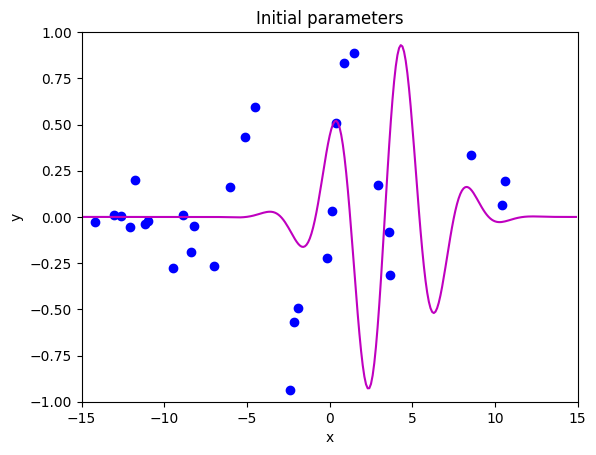

In [ ]:
# Initialize the parameters and draw the model
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency
draw_model(data,model,phi, "Initial parameters")


Now let's compute the sum of squares loss for the training data

In [ ]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Write this function -- replace the line below
  # TODO -- First make model predictions from data x
  # TODO -- Then compute the squared difference between the predictions and true y values
  # TODO -- Then sum them all and return
  y_pred = model(phi,data_x)
  loss = np.sum((y_pred-data_y)**2)

  return loss

Let's just test that we got that right

In [ ]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 16.419))

Your loss = 16.419, Correct loss = 16.419


Now let's plot the whole loss function

In [ ]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2328334872.py:24: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
/tmp/ipython-input-2328334872.py:24: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')


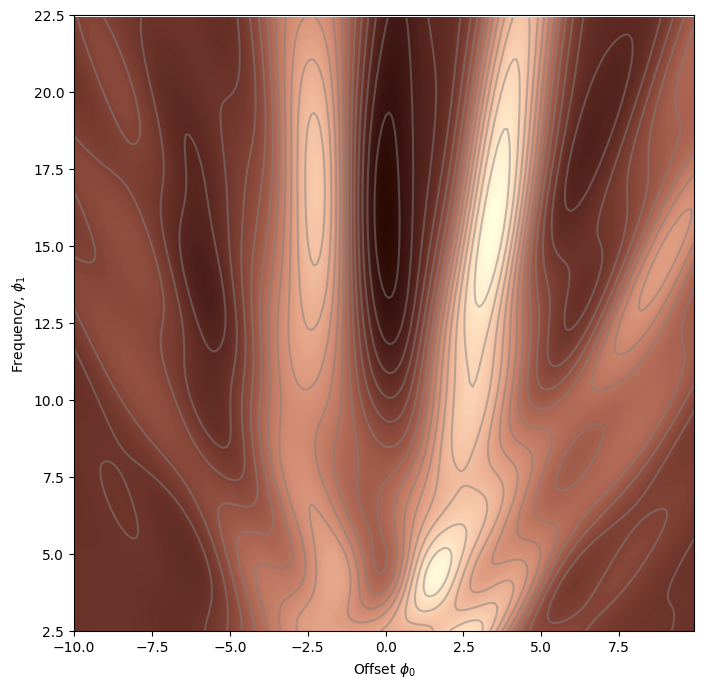

In [ ]:
draw_loss_function(compute_loss, data, model)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [ ]:
# These came from writing out the expression for the sum of squares loss and taking the
# derivative with respect to phi0 and phi1. It was a lot of hassle to get it right!
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function two million times, and usually computing the gradients directly is much more efficient.

In [ ]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))


Your gradients: (3.344,0.519)
Approx gradients: (3.344,0.519)


/tmp/ipython-input-330192272.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


Now we are ready to perform gradient descent.  We'll need to use our line search routine from Notebook 6.1, which I've reproduced here plus the helper function loss_function_1D that converts from a 2D problem to a 1D problem

In [ ]:
def loss_function_1D(dist_prop, data, model, phi_start, gradient):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ gradient * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then change B,C,D so they are half their current distance from A
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = a+ (b-a)/2
          c = a+ (c-a)/2
          d = a+ (d-a)/2
          continue;

        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

In [ ]:
def gradient_descent_step(phi, data,  model):
  # Step 1:  Compute the gradient
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  # Step 2:  Update the parameters -- note we want to search in the negative (downhill direction)
  alpha = line_search(data, model, phi, gradient*-1, max_dist = 2.0)
  phi = phi - alpha * gradient
  return phi

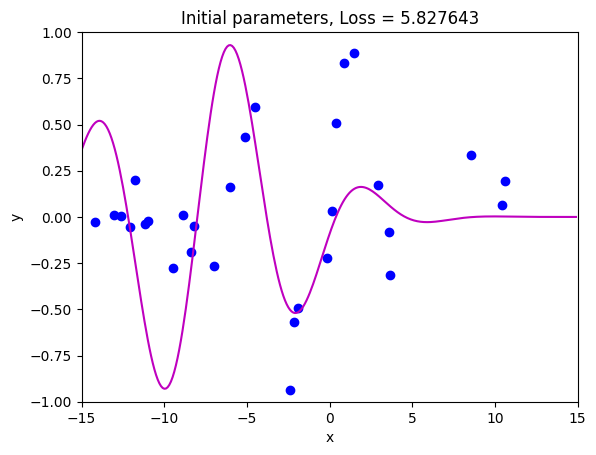

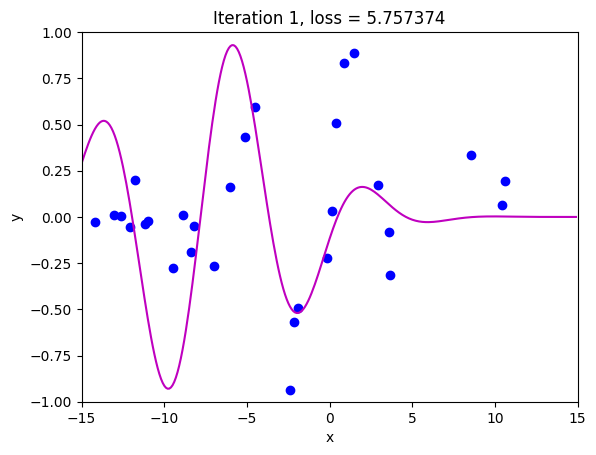

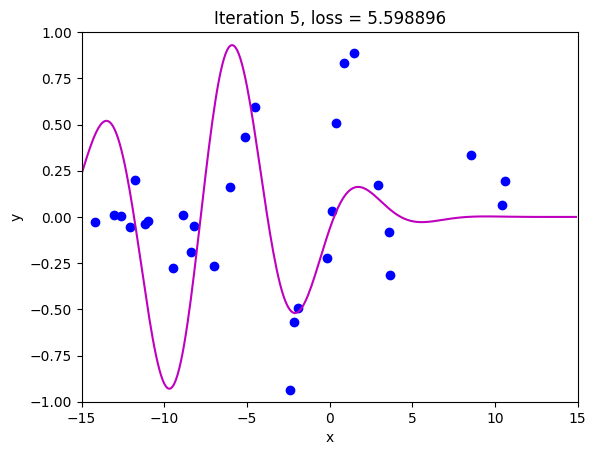

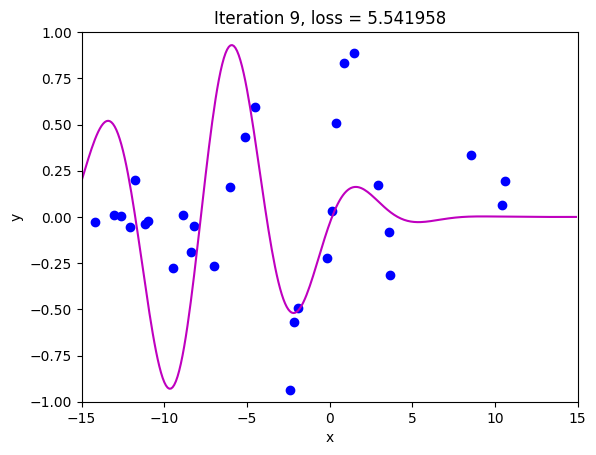

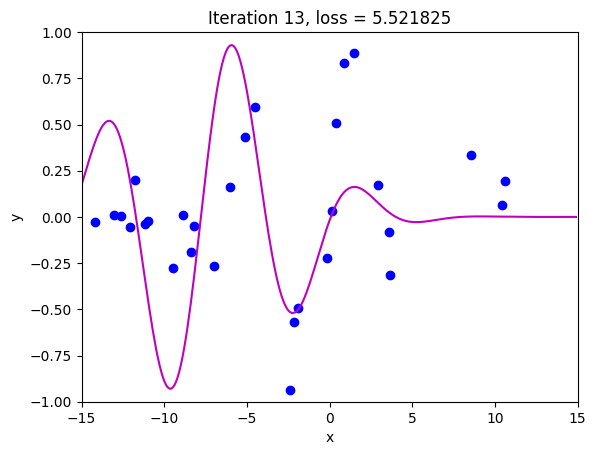

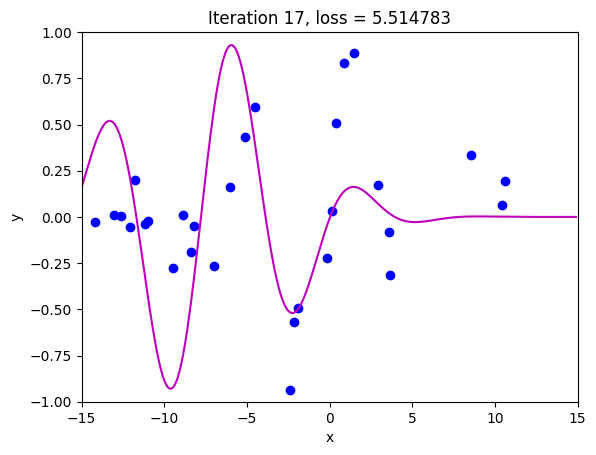

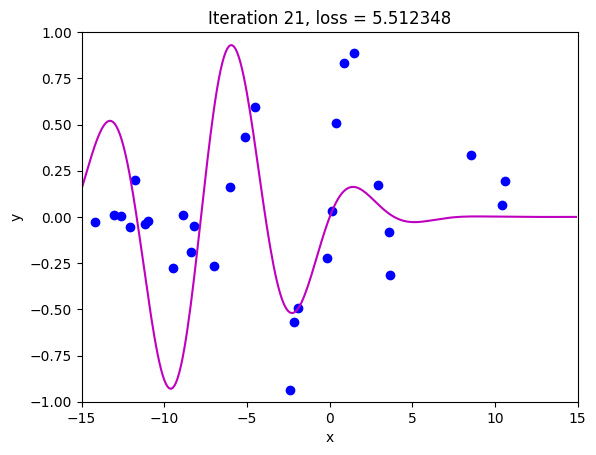

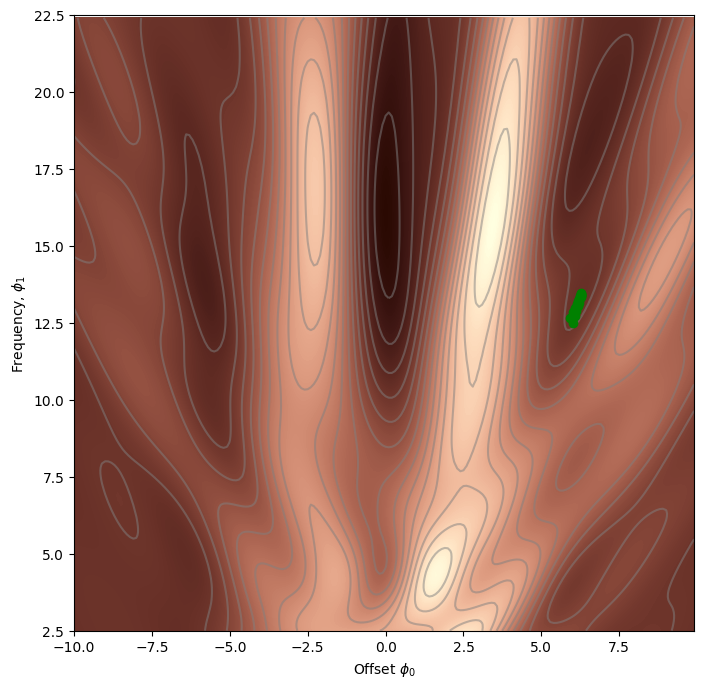

In [ ]:
# Initialize the parameters
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
#phi_all[0,0] = -1.5
#phi_all[1,0] = 8.5
phi_all[0,0] = 6
phi_all[1,0] = 12.5
# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Measure loss and draw model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)


In [ ]:
# TODO Experiment with starting the optimization in the previous cell in different places
# and show that it heads to a local minimum if we don't start it in the right valley

In [ ]:
def gradient_descent_step_fixed_learning_rate(phi, data, alpha):
  # TODO -- fill in this routine so that we take a fixed size step of size alpha without using line search
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  phi = phi - alpha * gradient
  return phi

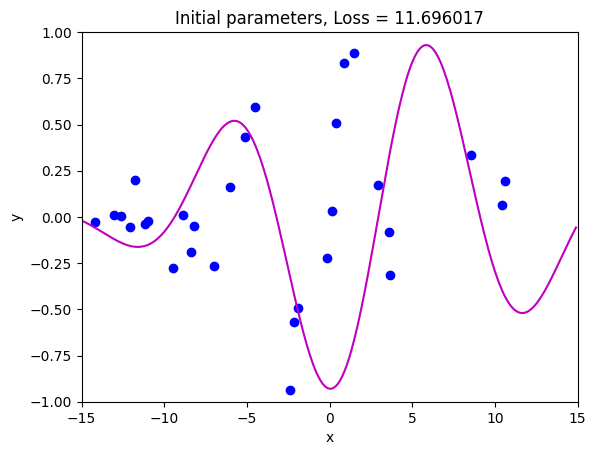

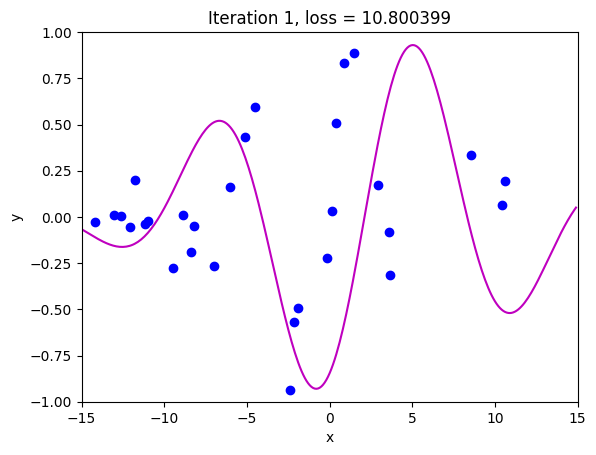

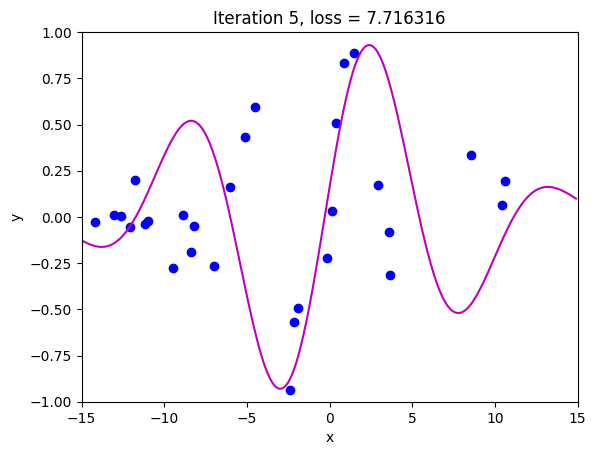

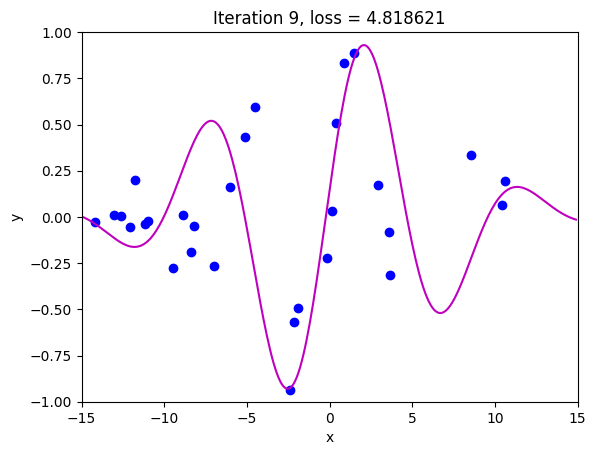

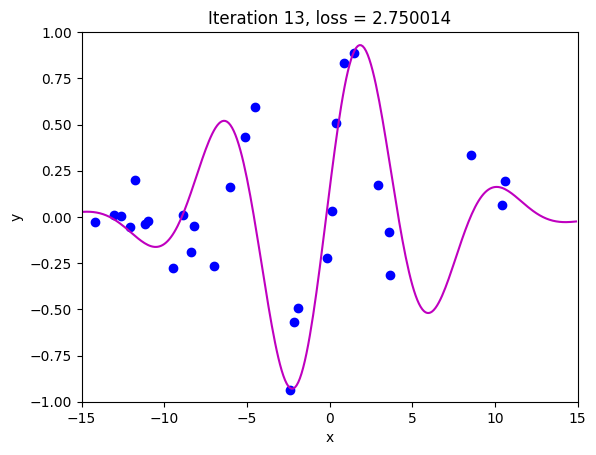

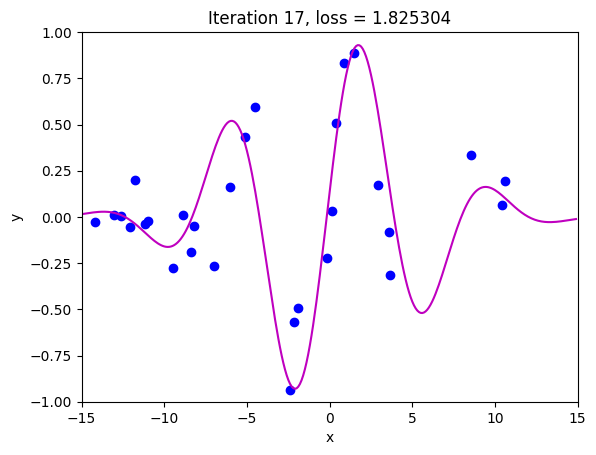

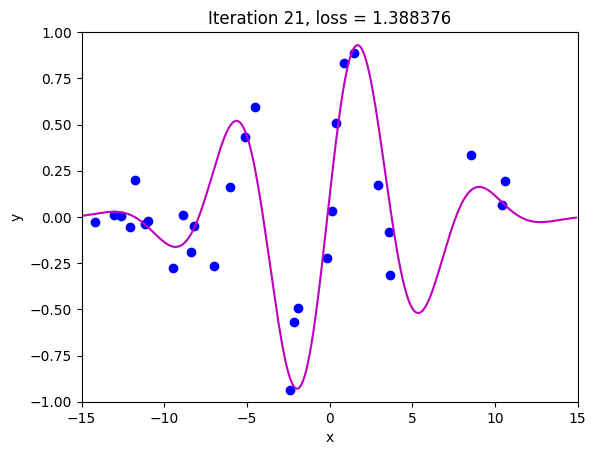

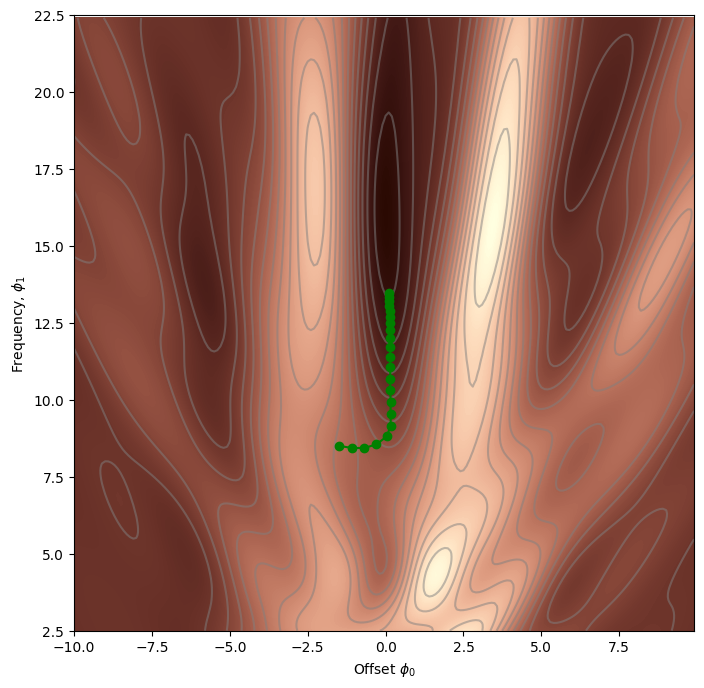

In [ ]:
# Initialize the parameters
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step_fixed_learning_rate(phi_all[:,c_step:c_step+1],data, alpha =0.2)
  # Measure loss and draw model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)


In [ ]:
# TODO Experiment with the learning rate, alpha.
# What happens if you set it too large?
# What happens if you set it too small?

In [ ]:
def stochastic_gradient_descent_step(phi, data, alpha, batch_size):
  # TODO -- fill in this routine so that we take a fixed size step of size alpha but only using a subset (batch) of the data
  # at each step
  # You can use the function np.random.permutation to generate a random permutation of the n_data = data.shape[1] indices
  # and then just choose the first n=batch_size of these indices.  Then compute the gradient update
  # from just the data with these indices.   More properly, you should sample without replacement, but this will do for now.
  n_data = data.shape[1]

  # Random permutation of indices, then take the first batch_size
  idx = np.random.permutation(n_data)[0:batch_size]

  # Mini-batch (assuming data[0,:] are x and data[1,:] are y)
  x_b = data[0, idx]
  y_b = data[1, idx]

  # Compute gradient on just the batch
  gradient = compute_gradient(x_b, y_b, phi)

  # Fixed step in the negative gradient direction
  phi = phi - alpha * gradient

  return phi

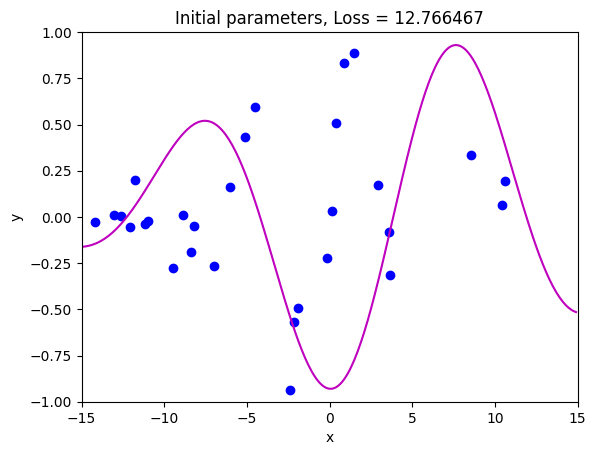

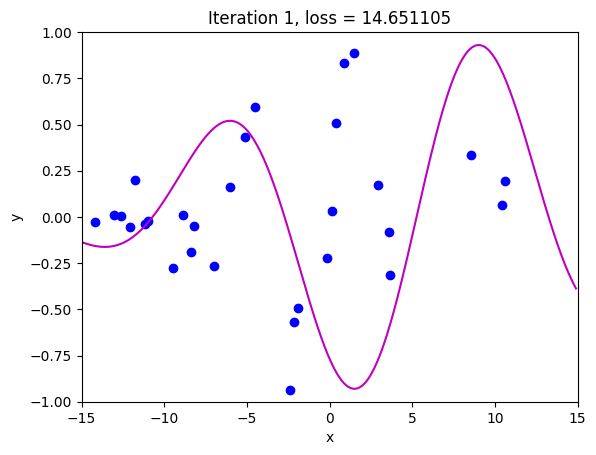

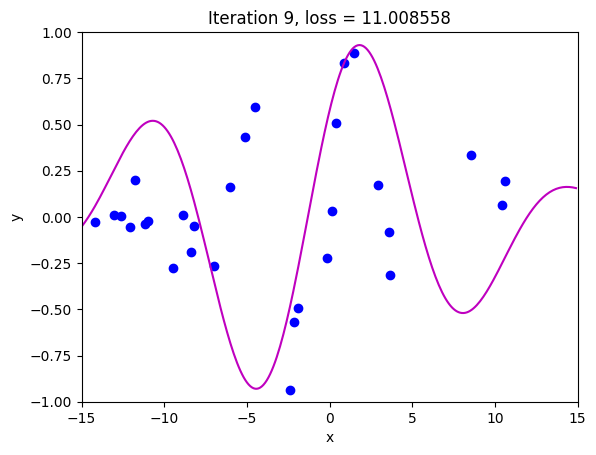

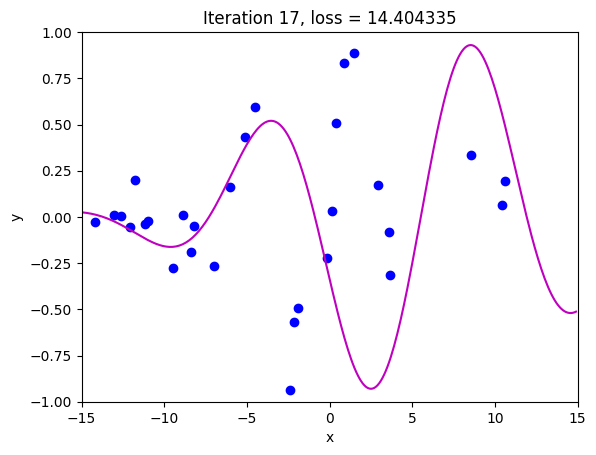

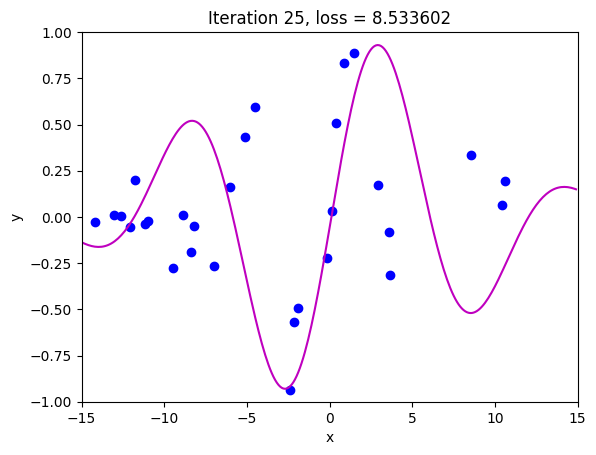

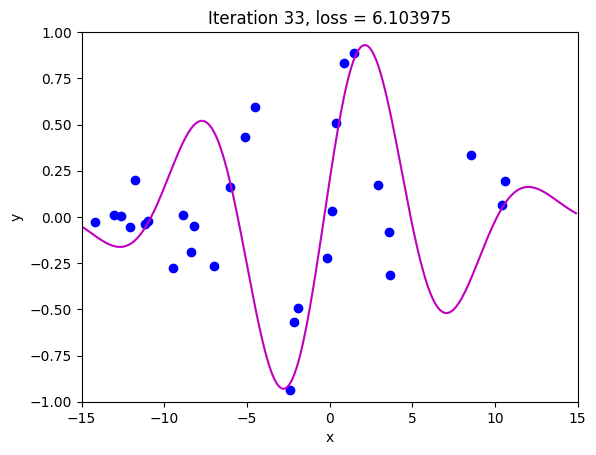

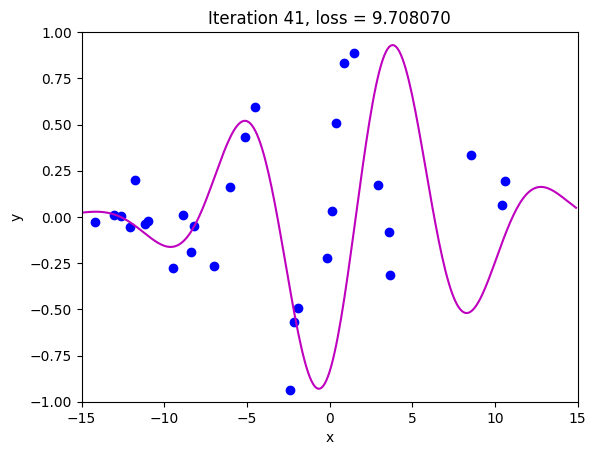

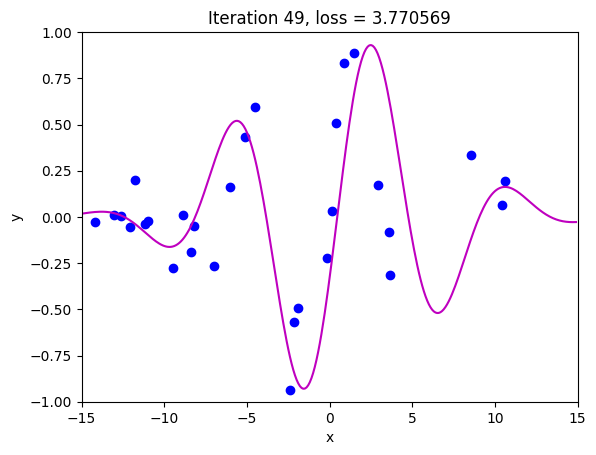

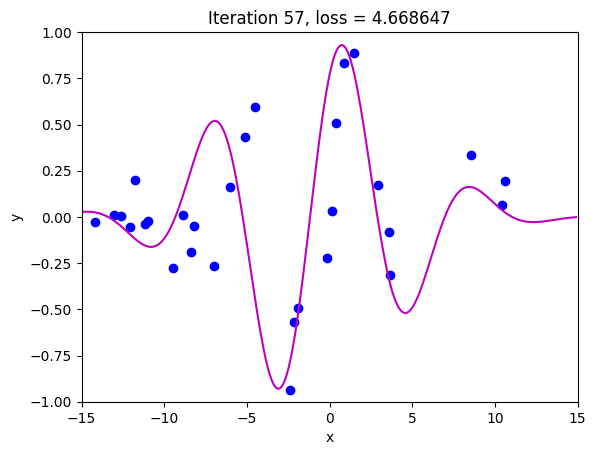

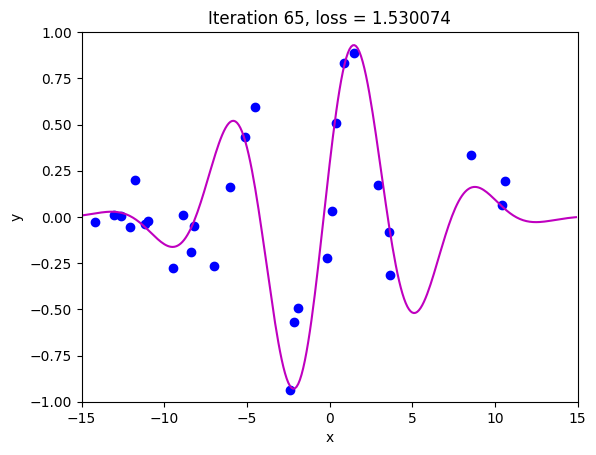

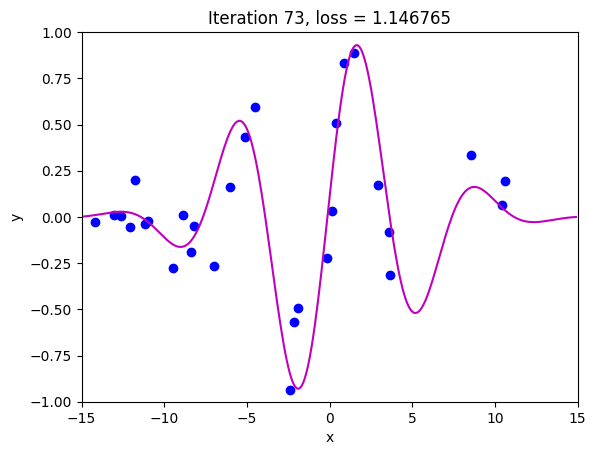

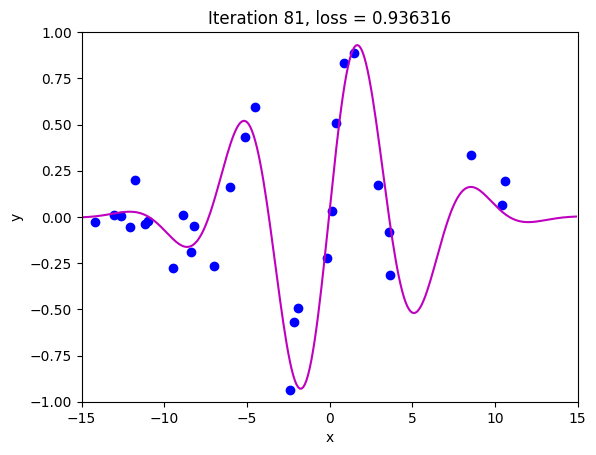

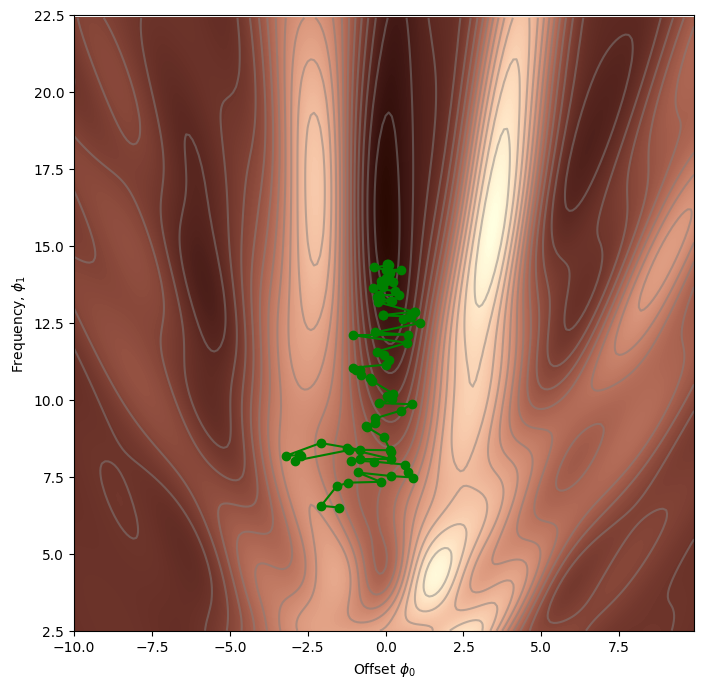

In [28]:
# Set the random number generator so you always get same numbers (disable if you don't want this)
np.random.seed(1)
# Initialize the parameters
n_steps = 81
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = stochastic_gradient_descent_step(phi_all[:,c_step:c_step+1],data, alpha =0.6, batch_size=5)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)

In [ ]:
# TODO -- Experiment with different learning rates, starting points, batch sizes, number of steps.  Get a feel for this.

In [ ]:
# TODO -- Add a learning rate schedule.  Reduce the learning rate by a factor of beta every M iterations